# Reto de Agrupación

## Justificación:

*Algoritmo Seleccionado*: K-Means

*Justificación*:
- Simple y razonablemente rápido
- Es posible seleccionar el número de grupos
- Aunque es sensible a la inicialización y las fronteras, si se tiene una selección de datos adecuada, los resultados generalmente son buenos

## Instalación de dependencias
Dependiendo del entorno de ejecución, es necesario instalar las bibliotecas necesarias para la ejecución del notebook. Según sea el caso, comentar o dejar intactas las líneas siguientes

In [1]:
!pip install -U scikit-learn
!pip install -U opencv-contrib-python
!git clone https://github.com/veroarriola/Deformable-Objects-Dataset

Cloning into 'Deformable-Objects-Dataset'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 77 (delta 26), reused 74 (delta 26), pack-reused 0
Receiving objects: 100% (77/77), 7.89 MiB | 5.64 MiB/s, done.
Resolving deltas: 100% (26/26), done.


## Importar Bibliotecas a utilizar

In [2]:
from crea_tabla import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import pickle

## Definición de funciones

In [3]:
def np_a_img(datos3D):
    """
    Recibe la imagen del cuadro con 6 canales y regresa
    una vista RGB
    """
    return datos3D[:,:,[2,1,0]].astype(int)

In [4]:
def muestra(datos3D, estimador_k_medias, grupos):
    """
    Recibe la imagen aún con componentes IXY RGB y HSV
    y el estimador tipo k-medias ya entrenado.
    """
    img = np_a_img(datos3D)
    centros = estimador.cluster_centers_[:,[1,2,5,4,3]] # i,j,R,G,B
    print(centros)
    plt.scatter(centros[1], centros[0], c=centros[grupos])
    plt.imshow(img)

In [5]:
def muestra(datos3D):
    """
    Recibe la imagen aún con componentes IXY RGB y HSV
    """
    img = np_a_img(datos3D)
    plt.imshow(img)

In [6]:
def muestra_segmentación(ind):
    datos3D = originales[ind]
    img = np_a_img(datos3D)
    tabla = convierte_a_tabla(datos3D)
    tabla_ajustada = tabla.drop(["f", "i", "j", "H", "S", "V"] , axis=1)
    agrupación = estimador.predict(tabla_ajustada)
    etqs = agrupación.reshape((datos3D.shape[0], datos3D.shape[1]))
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2)
    ax0.imshow(img)
    ax1.imshow(etqs)

In [7]:
def grafica_pixeles_rgb(datos3D):
    puntos = datos3D.reshape(datos3D.shape[0] * datos3D.shape[1], 6)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(puntos[:, 0], puntos[:, 1], puntos[:, 2], c=puntos[:, :3]/255.0, marker='.')
    ax.set_xlabel('Azul')
    ax.set_ylabel('Rojo')
    ax.set_zlabel('Verde')
    plt.show()

## Carga de la fuente de datos

In [8]:
datos_1, originales = obtén_tabla_datos()
datos_1.head

Leyendo numpy...
Organizando renglones...
Creando tabla de datos...
Terminado


<bound method NDFrame.head of             f      i       j      B      G      R     H      S      V
0         0.0    0.0     0.0  108.0  200.0  176.0  38.0  117.0  200.0
1         0.0    0.0     1.0  108.0  200.0  176.0  38.0  117.0  200.0
2         0.0    0.0     2.0  108.0  200.0  176.0  38.0  117.0  200.0
3         0.0    0.0     3.0  108.0  200.0  176.0  38.0  117.0  200.0
4         0.0    0.0     4.0  108.0  200.0  176.0  38.0  117.0  200.0
...       ...    ...     ...    ...    ...    ...   ...    ...    ...
3724891  75.0  963.0  1283.0   35.0   40.0   33.0  69.0   45.0   40.0
3724892  75.0  963.0  1284.0   35.0   40.0   33.0  69.0   45.0   40.0
3724893  75.0  963.0  1285.0   35.0   40.0   33.0  69.0   45.0   40.0
3724894  75.0  963.0  1286.0   35.0   40.0   33.0  69.0   45.0   40.0
3724895  75.0  963.0  1287.0   35.0   40.0   33.0  69.0   45.0   40.0

[3724896 rows x 9 columns]>

## Análisis de los datos

In [9]:
datos_1.shape #3724896 muestras con 9 caracteristicas

(3724896, 9)

In [10]:
datos_1.columns.values #Caracteristicas son frame, posición de pixel x, posición de pixel y, valor pixel en escalas BGR y HSV

array(['f', 'i', 'j', 'B', 'G', 'R', 'H', 'S', 'V'], dtype=object)

In [11]:
# Contamos el número de frames
datos_1['f'].nunique()

3

In [12]:
# Validamos cuales son los frames capturas
datos_1['f'].unique()

array([ 0., 30., 75.])

In [13]:
# Imprimimos la forma de los datos originales
originales.shape # 100 Frames, las imágenes son de 964 * 1288

(100, 964, 1288, 6)

In [14]:
# Imprimimos la 4ta dimension de los datos originales en el frame 0
originales[0][3] # Los tres primeros corresponden a BGR y los tres segundos a la escala HSV

array([[108., 200., 176.,  38., 117., 200.],
       [108., 200., 176.,  38., 117., 200.],
       [108., 200., 176.,  38., 117., 200.],
       ...,
       [ 22.,  31.,  32.,  27.,  80.,  32.],
       [ 22.,  31.,  32.,  27.,  80.,  32.],
       [ 22.,  31.,  32.,  27.,  80.,  32.]])

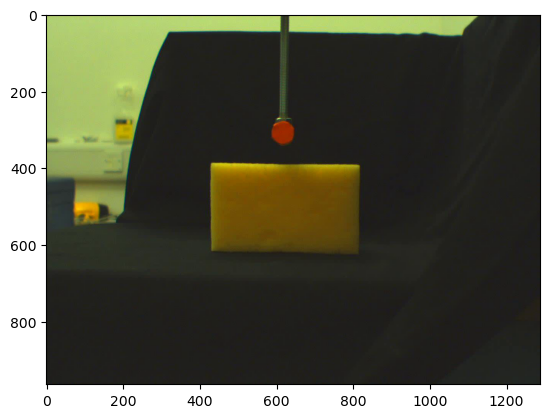

In [15]:
# Mostramos las imagenes de los fotogramas 0, 30 y 75
muestra(originales[0])

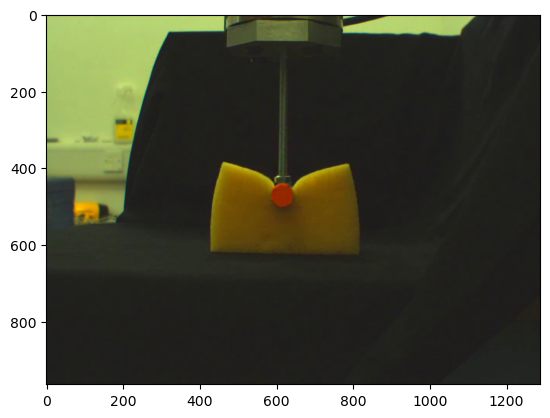

In [16]:
muestra(originales[30])

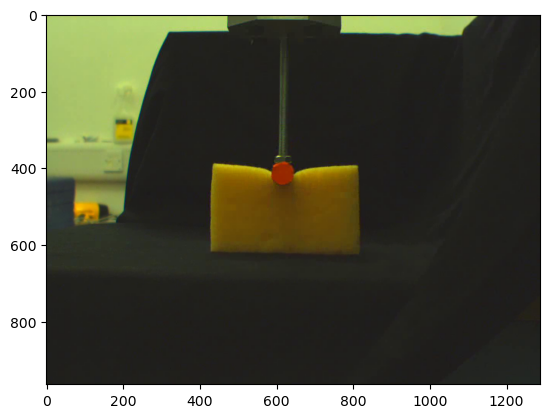

In [17]:
muestra(originales[75])

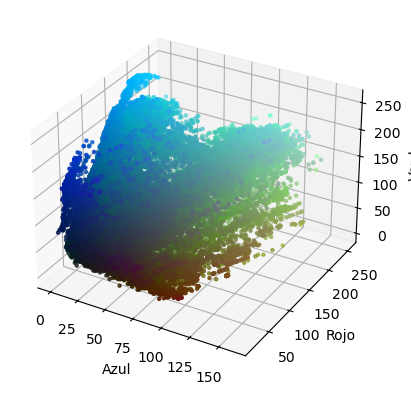

In [18]:
# Graficamos los pixeles de los mismos fotogramas
grafica_pixeles_rgb(originales[0])

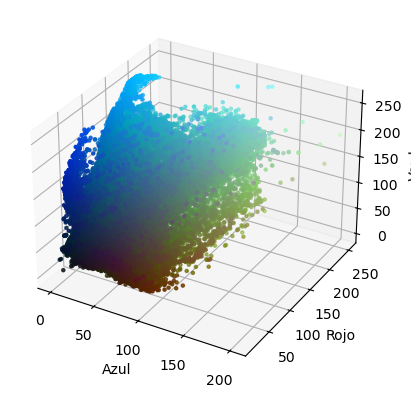

In [19]:
grafica_pixeles_rgb(originales[30])

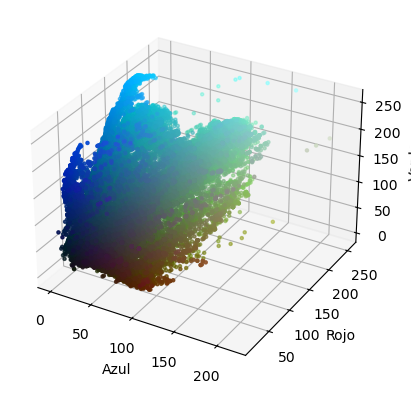

In [20]:
grafica_pixeles_rgb(originales[75])

## Entrenamiento
Se determina utilizar K-Means con las caracteristicas correspondientes a la escala RGB y un valor k (Grupos) de 7, con un méximo de iteraciones a 700
y el algoritmo elkan

In [21]:
# Selección de los datos con escala BGR
X = datos_1.drop(["f", "i", "j", "H", "S", "V"] , axis=1)
X

,B,G,R
0,108.0,200.0,176.0
1,108.0,200.0,176.0
2,108.0,200.0,176.0
3,108.0,200.0,176.0
4,108.0,200.0,176.0
...,...,...,...
3724891,35.0,40.0,33.0
3724892,35.0,40.0,33.0
3724893,35.0,40.0,33.0
3724894,35.0,40.0,33.0


In [22]:
# Configuración del algoritmo
k = 7
kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0, max_iter=700, algorithm='elkan')
kmeans

KMeans(algorithm='elkan', max_iter=700, n_clusters=7, random_state=0)

In [23]:
# Entrenamiento con el conjunto de datos
estimador = kmeans.fit(X)

In [24]:
# Imprimimos los centroides
estimador.cluster_centers_

array([[ 40.31946369,  50.28069798,  45.08271213],
       [108.47192605, 203.41331737, 176.14612494],
       [ 28.45687807,  31.88647808,  32.26437699],
       [ 17.49277995,  72.36567977,  91.76551371],
       [ 81.74977428, 153.25883529, 135.52928974],
       [  8.52988213, 152.48333864, 182.81191462],
       [  4.88779   ,  84.24815426, 122.55989787]])

## Validaciones

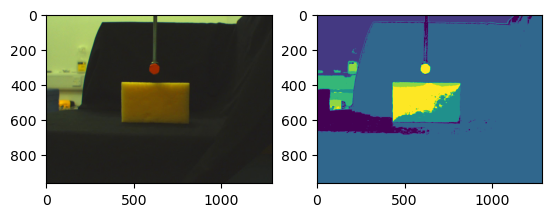

In [25]:
muestra_segmentación(1)

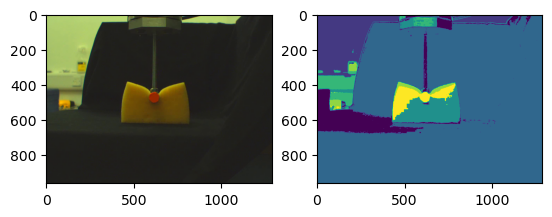

In [26]:
muestra_segmentación(31)

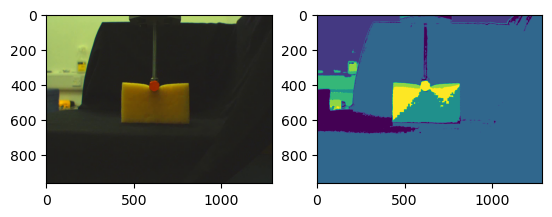

In [27]:
muestra_segmentación(76)

## Se guarda el modelo en formato pkl

In [28]:
with open('kmedias_esponja_jfvg.pkl','wb') as archivo:
    pickle.dump(estimador, archivo)

## Conclusiones
Al utilizar 7 grupos podemos observar que la esponja queda dividida en al menos tres grupos diferentes, además, existe una la clasificación en la que el dedo robotico pertenece a la misma clase de algunas regiones de la esponja. Se realiaron pruebas con 10, 15 y 20 grupos, y, a pesar de tener una diferenciación con el dedo robótico, la esponja tambien se ve afectada en el número de segmentaciones.

Como alternativas pueden plantearse un preprocesamiento de las imágenes (Como escala de grises) y normalizaciones. Tambien una alternativa seria entrenar con los valores HSV por separado y en conjunto con la escala RGB.